In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error
import joblib

In [2]:
df = pd.read_csv('sydney_data.csv')

In [3]:
# Check for missing values
df.isnull().sum()

# Clean the "Time to CBD (Public Transport) [Town Hall St]" column
df['Time to CBD (Public Transport) [Town Hall St]'] = df['Time to CBD (Public Transport) [Town Hall St]'].str.replace(' minuntes', '')

# Convert data types
df['Time to CBD (Public Transport) [Town Hall St]'] = pd.to_numeric(df['Time to CBD (Public Transport) [Town Hall St]'], errors='coerce')

# Check for missing values again after cleaning and conversion
df.isnull().sum()

Name                                               0
Region                                             0
Population (rounded)*                              0
Postcode                                           0
Ethnic Breakdown 2016                              0
Median House Price (2020)                          1
Median House Price (2021)                         12
% Change                                           0
Median House Rent (per week)                      19
Median Apartment Price (2020)                    122
Median Apartment Rent (per week)                  71
Public Housing %                                   2
Avg. Years Held                                   51
Time to CBD (Public Transport) [Town Hall St]    303
Time to CBD (Driving) [Town Hall St]               2
Nearest Train Station                             71
Highlights/Attractions                           307
Ideal for                                        305
Traffic                                       

In [4]:
df.dropna()

,Name,Region,Population (rounded)*,Postcode,Ethnic Breakdown 2016,Median House Price (2020),Median House Price (2021),% Change,Median House Rent (per week),Median Apartment Price (2020),...,Affordability (Rental),Affordability (Buying),Nature,Noise,Things to See/Do,Family-Friendliness,Pet Friendliness,Safety,Overall Rating,Review Link
0,Hornsby,Upper North Shore,"23,000",2077,"Chinese 17.1%, English 16.8%, Australian 14.0%...","$1,150,000.00","$1,400,000.00",21.74%,$600.00,"$645,000.00",...,7.0,6.0,8.0,7.0,7.0,9.0,8.0,9.0,7.1,https://sydneysuburbreviews.com/hornsby
1,Oatley,Southern Suburbs,"10,500",2223,"English 23.0%, Australian 21.1%, Chinese 9.8%,...","$1,550,000.00","$1,800,000.00",16.13%,$670.00,"$780,000.00",...,6.0,4.0,8.0,9.0,5.0,9.0,8.0,9.0,7.0,https://sydneysuburbreviews.com/oatley-suburb-...
2,Dulwich Hill,Inner West,"14,500",2203,"English 19.4%, Australian 16.4%, Irish 9.5%, S...","$1,500,000.00","$1,900,000.00",26.67%,$725.00,"$780,000.00",...,6.0,4.0,8.0,7.0,6.0,8.0,9.0,8.0,6.9,https://sydneysuburbreviews.com/dulwich-hill
3,Jannali,Sutherland Shire,"6,250",2226,"English 28.2%, Australian 26.3%, Irish 9.8%, S...","$1,050,000.00","$1,300,000.00",23.81%,$610.00,"$620,000.00",...,7.0,7.0,7.0,8.0,2.0,8.0,8.0,9.0,6.8,https://sydneysuburbreviews.com/jannali
4,Waverton,Lower North Shore,"3,250",2060,"English 24.9%, Australian 15.5%, Irish 11.0%, ...","$2,650,000.00","$3,400,000.00",28.30%,"$1,000.00","$1,200,000.00",...,5.0,2.0,8.0,9.0,4.0,9.0,8.0,9.0,6.8,https://sydneysuburbreviews.com/waverton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,Redfern,Inner East,"13,500",2016,"English 20.8%, Australian 14.1%, Irish 9.5%, C...","$1,400,000.00","$1,800,000.00",28.57%,$850.00,"$970,000.00",...,3.0,3.0,6.0,4.0,9.0,5.0,5.0,3.0,5.0,https://sydneysuburbreviews.com/redfern
110,Zetland,Inner East,"10,000",2017,"Chinese 33.8%, English 13.1%, Australian 8.1%,...","$1,400,000.00","$1,750,000.00",25.00%,$975.00,"$920,000.00",...,5.0,5.0,6.0,3.0,4.0,5.0,6.0,7.0,5.0,https://sydneysuburbreviews.com/zetland
111,Darlinghurst,Sydney City,"12,000",2010,"English 22.4%, Australian 12.4%, Irish 9.6%, S...","$1,850,000.00","$2,200,000.00",18.92%,$950.00,"$975,000.00",...,4.0,3.0,5.0,4.0,7.0,5.0,7.0,4.0,4.9,https://sydneysuburbreviews.com/darlinghurst
112,Mascot,Southern Suburbs,"15,000",2020,"Chinese 18.1%, English 13.0%, Australian 11.7%...","$1,250,000.00","$1,600,000.00",28.00%,$710.00,"$815,000.00",...,5.0,6.0,5.0,2.0,6.0,5.0,5.0,6.0,4.9,https://sydneysuburbreviews.com/mascot


In [5]:
print(df.dtypes)

Name                                              object
Region                                            object
Population (rounded)*                             object
Postcode                                           int64
Ethnic Breakdown 2016                             object
Median House Price (2020)                         object
Median House Price (2021)                         object
% Change                                          object
Median House Rent (per week)                      object
Median Apartment Price (2020)                     object
Median Apartment Rent (per week)                  object
Public Housing %                                  object
Avg. Years Held                                  float64
Time to CBD (Public Transport) [Town Hall St]    float64
Time to CBD (Driving) [Town Hall St]              object
Nearest Train Station                             object
Highlights/Attractions                            object
Ideal for                      

In [6]:
# Check unique values in the "Time to CBD (Public Transport) [Town Hall St]" column
print(df['Time to CBD (Public Transport) [Town Hall St]'].unique())

# Check unique values in the "Median House Price (2020)" column
print(df['Median House Price (2020)'].unique())

[40. 30. 20. 35. 10. 22. 55. 45. 60. 25. 15. 50. 65.  8. 12. nan]
['$1,150,000.00' '$1,550,000.00' '$1,500,000.00' '$1,050,000.00'
 '$2,650,000.00' '$1,800,000.00' '$800,000.00' '$1,700,000.00'
 '$2,500,000.00' '$1,400,000.00' '$950,000.00' '$965,000.00'
 '$2,150,000.00' '$1,200,000.00' '$1,900,000.00' '$925,000.00'
 '$2,050,000.00' '$1,250,000.00' '$2,850,000.00' '$2,600,000.00'
 '$1,950,000.00' '$1,650,000.00' '$2,100,000.00' '$2,800,000.00'
 '$1,000,000.00' '$2,000,000.00' '$2,900,000.00' '$3,600,000.00'
 '$1,600,000.00' '$2,250,000.00' '$1,450,000.00' '$855,000.00'
 '$1,300,000.00' '$2,550,000.00' '$1,100,000.00' '$940,000.00'
 '$890,000.00' '$1,480,000.00' '$970,000.00' '$1,750,000.00'
 '$2,400,000.00' '$2,200,000.00' '-' '$4,200,000.00' '$3,550,000.00'
 '$1,350,000.00' '$975,000.00' '$2,300,000.00' '$1,850,000.00'
 '$680,000.00' '$825,000.00' '$830,000.00' '$720,000.00' '$775,000.00'
 '$910,000.00' '$820,000.00' '$755,000.00' '$850,000.00' '$675,000.00'
 '$740,000.00' '$700,000.0

In [7]:
# Remove dollar signs and commas from the "Median House Price (2020)" column
df['Median House Price (2020)'] = df['Median House Price (2020)'].str.replace('[\$,]', '', regex=True)

# Convert the column to a numeric type
df['Median House Price (2020)'] = pd.to_numeric(df['Median House Price (2020)'], errors='coerce')

Correlation with Median House Price (2020): -0.2589294538778912


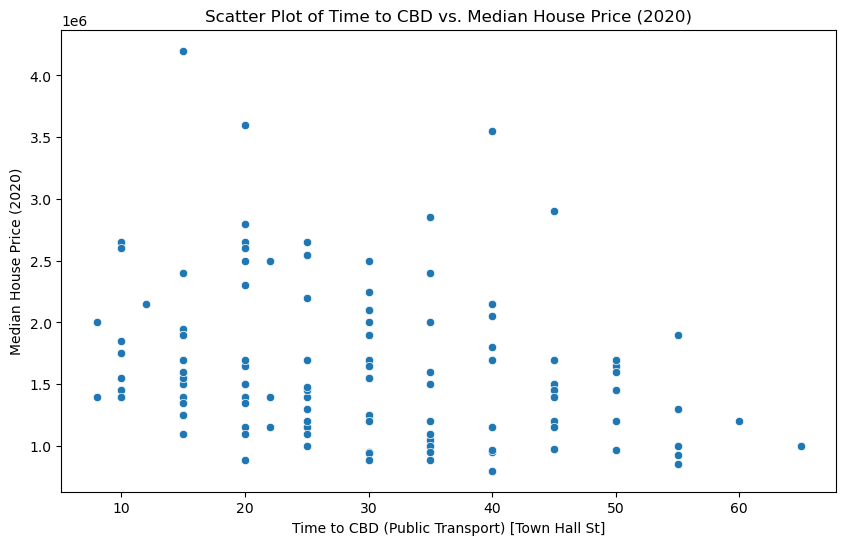

In [8]:
# Calculate correlations
correlation_2020 = df['Time to CBD (Public Transport) [Town Hall St]'].corr(df['Median House Price (2020)'])

print(f"Correlation with Median House Price (2020): {correlation_2020}")

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Time to CBD (Public Transport) [Town Hall St]', y='Median House Price (2020)', data=df)
plt.title('Scatter Plot of Time to CBD vs. Median House Price (2020)')
plt.xlabel('Time to CBD (Public Transport) [Town Hall St]')
plt.ylabel('Median House Price (2020)')
plt.show()

The correlation between "Time to CBD via public transport" and "Median House Price (2020)" is approximately -0.259. This negative correlation suggests that as the time to reach the Central Business District (CBD) via public transport increases, the median house prices tend to decrease, albeit not very strongly.

### Histogram of House Prices: Visualize the distribution of median house prices for a better understanding of the data.

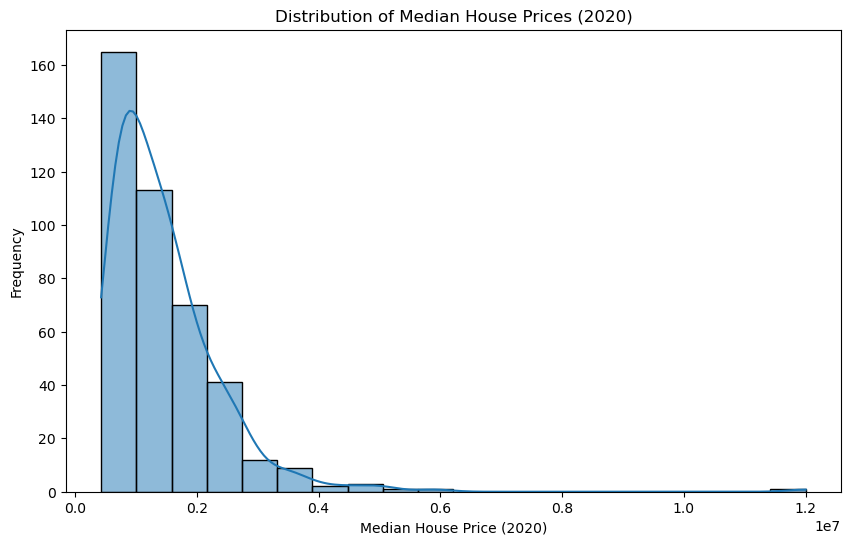

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Median House Price (2020)'], bins=20, kde=True)
plt.title('Distribution of Median House Prices (2020)')
plt.xlabel('Median House Price (2020)')
plt.ylabel('Frequency')
plt.show()

### Box Plot of House Prices by Region: Explore how median house prices vary by region.

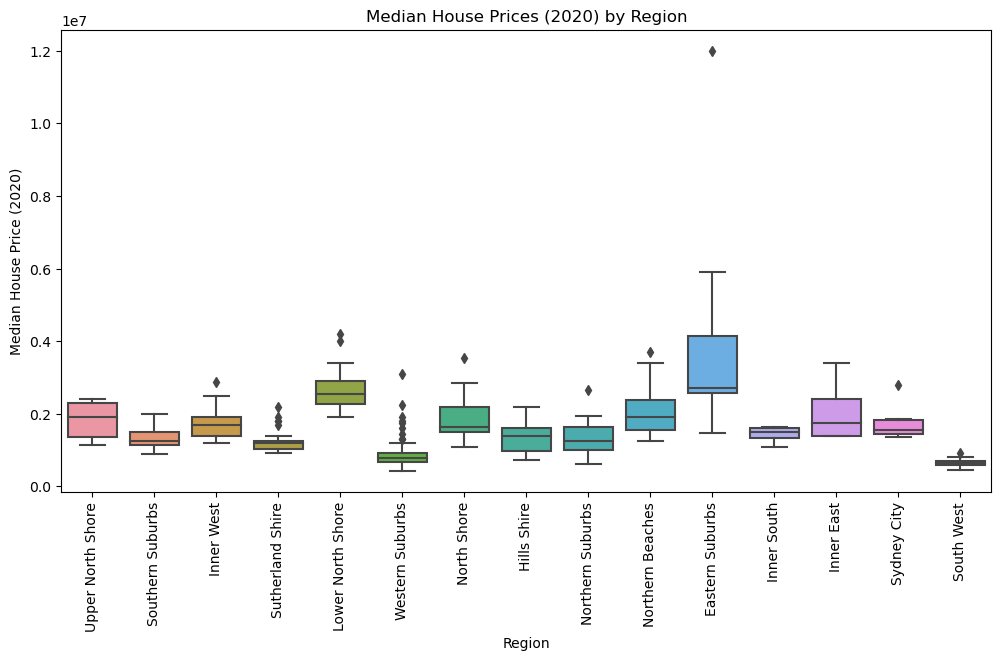

In [10]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Region', y='Median House Price (2020)', data=df)
plt.title('Median House Prices (2020) by Region')
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Median House Price (2020)')
plt.show()

### Scatter Plot Matrix: Create a matrix of scatter plots to visualize relationships between multiple numeric variables.

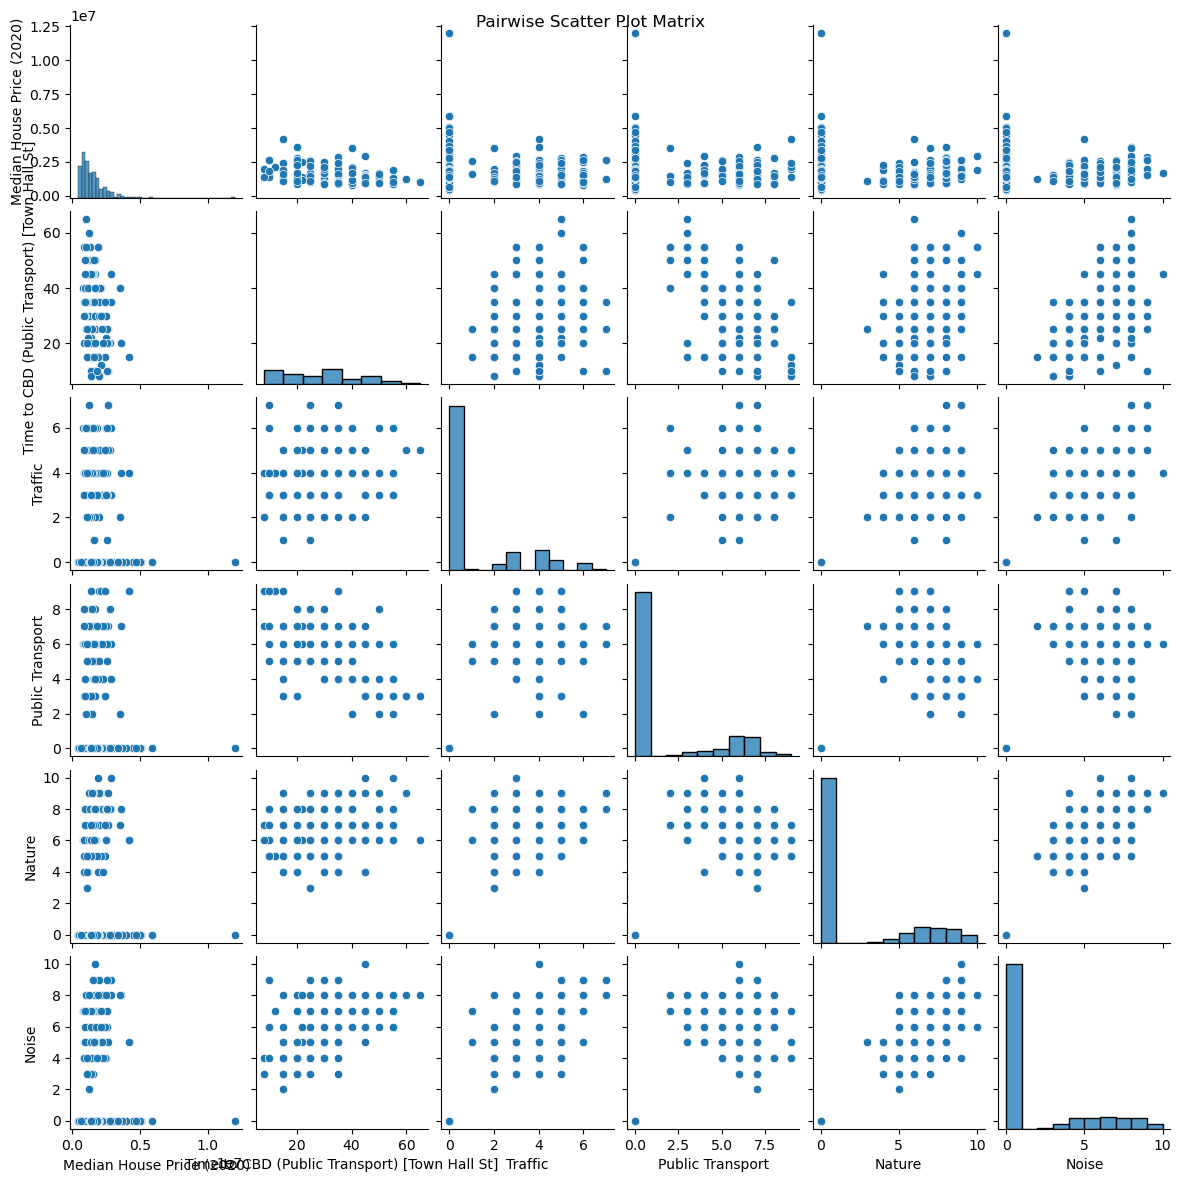

In [11]:
numeric_columns = [
    'Median House Price (2020)',
    'Time to CBD (Public Transport) [Town Hall St]',
    'Traffic',
    'Public Transport',
    'Nature',
    'Noise'
]

sns.pairplot(df[numeric_columns], height=2)
plt.suptitle('Pairwise Scatter Plot Matrix')
plt.show()

# Feature Engineering

In [12]:
# Feature that represents the proximity to the nearest train station.
df['Proximity to Train Station'] = 1 / (df['Time to CBD (Public Transport) [Town Hall St]'] + 1)

# Statistical Tests

In [13]:
from scipy import stats 
# Calculate the correlation between 'Public Transport' and 'Traffic' using Pandas corr()
correlation_traffic_transport = df['Public Transport'].corr(df['Traffic'], method='pearson')

print(f"Correlation between 'Public Transport' and 'Traffic': {correlation_traffic_transport}")

# Define a significance level (alpha)
alpha = 0.05

# Calculate the number of observations
n = len(df.dropna(subset=['Public Transport', 'Traffic']))

# Calculate the degrees of freedom
degrees_of_freedom = n - 2

# Calculate the critical value for a two-tailed test
critical_value = stats.t.ppf(1 - alpha / 2, df=degrees_of_freedom)

# Calculate the standard error of the correlation coefficient
standard_error = 1 / np.sqrt(degrees_of_freedom)

# Calculate the z-score
z_score = correlation_traffic_transport / standard_error

# Calculate the p-value for the two-tailed test
p_value_traffic_transport = 2 * (1 - stats.norm.cdf(np.abs(z_score)))

print(f"P-Value: {p_value_traffic_transport}")

# Check if the correlation is statistically significant
if p_value_traffic_transport < alpha:
    print("The correlation is statistically significant (reject the null hypothesis)")
else:
    print("The correlation is not statistically significant (fail to reject the null hypothesis)")

Correlation between 'Public Transport' and 'Traffic': 0.8927646900894932
P-Value: 0.0
The correlation is statistically significant (reject the null hypothesis)


Hypothesis Testing:

Perform hypothesis tests to answer specific questions. For example, you can test hypotheses like:

1. Is there a statistically significant difference in median house prices between different regions?
2. Does the proximity to train stations have a significant impact on house prices?

In [14]:
# Hypothesis test for regional differences in house prices
region_groups = df.groupby('Region')['Median House Price (2020)']
region_names = df['Region'].unique()

for i in range(len(region_names)):
    for j in range(i + 1, len(region_names)):
        region1 = region_groups.get_group(region_names[i])
        region2 = region_groups.get_group(region_names[j])
        t_stat, p_value = ttest_ind(region1, region2)
        print(f'Test between {region_names[i]} and {region_names[j]}: p-value = {p_value}')

Test between Upper North Shore and Southern Suburbs: p-value = 0.0004912616290968691
Test between Upper North Shore and Inner West: p-value = nan
Test between Upper North Shore and Sutherland Shire: p-value = 0.0008504119633058972
Test between Upper North Shore and Lower North Shore: p-value = 0.0004171564290281482
Test between Upper North Shore and Western Suburbs: p-value = 1.0762454897082917e-12
Test between Upper North Shore and North Shore: p-value = nan
Test between Upper North Shore and Hills Shire: p-value = 0.022398872071697204
Test between Upper North Shore and Northern Suburbs: p-value = 0.035189847318347525
Test between Upper North Shore and Northern Beaches: p-value = 0.2350608391129712
Test between Upper North Shore and Eastern Suburbs: p-value = 0.022114521805096394
Test between Upper North Shore and Inner South: p-value = 0.21043965309506854
Test between Upper North Shore and Inner East: p-value = 0.4537489112563916
Test between Upper North Shore and Sydney City: p-valu

Correlation Heatmap:

Create a heatmap to visualize the correlations between all numerical variables in dataset.

/var/folders/df/npmhf4fs0qb8cnwm2kmptxk00000gn/T/ipykernel_18479/813099107.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


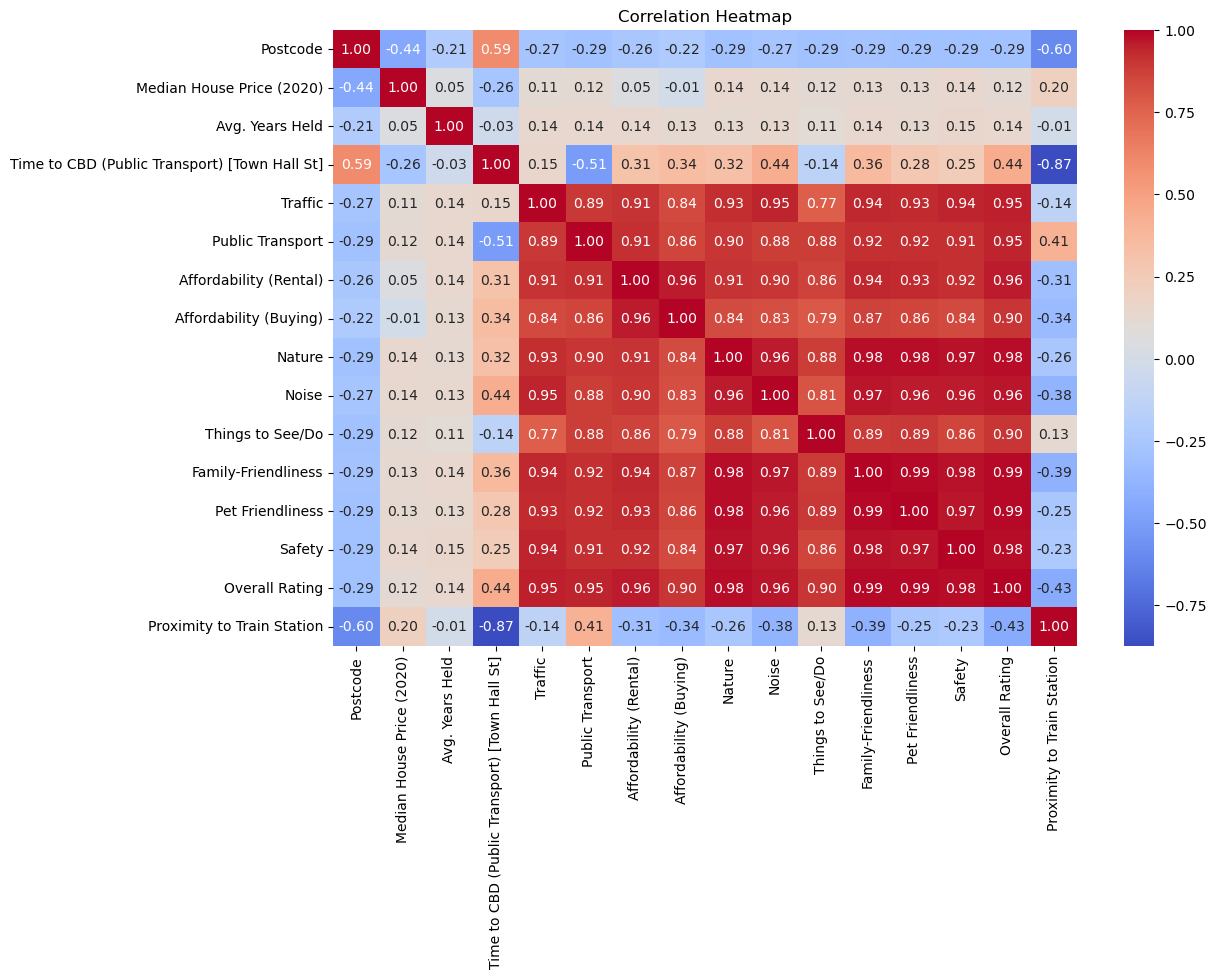

In [15]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Machine Learning Models

## LinearRegression

In [16]:
# Define the features and target variable
X = df[['Proximity to Train Station', 'Traffic', 'Public Transport', 'Nature', 'Noise']]
y = df['Median House Price (2020)']

# Check for and handle missing values in the target variable 'y'
if y.isnull().any():
    # Handle missing values in 'y' by imputing with the mean
    imputer = SimpleImputer(strategy='mean')
    y = imputer.fit_transform(y.values.reshape(-1, 1))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the imputer to handle missing values in features
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on the training data
X_train_imputed = imputer.fit_transform(X_train)

# Transform the test data with the same imputer
X_test_imputed = imputer.transform(X_test)

# Initialize the linear regression model
model = LinearRegression()

# Fit the model to the training data with imputed features
model.fit(X_train_imputed, y_train)

# Make predictions on the test data with imputed features
y_pred = model.predict(X_test_imputed)

# Evaluate the model using MSE and MAE
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")

Mean Squared Error (MSE): 952312659570.1501
Mean Absolute Error (MAE): 652830.4445053244


In the above code:

1. We check for missing values in the target variable 'y' using y.isnull().any(), and if there are missing values, we impute them with the mean using SimpleImputer.
2. We proceed with the model building and evaluation steps as before after handling any potential missing values in the target variable.

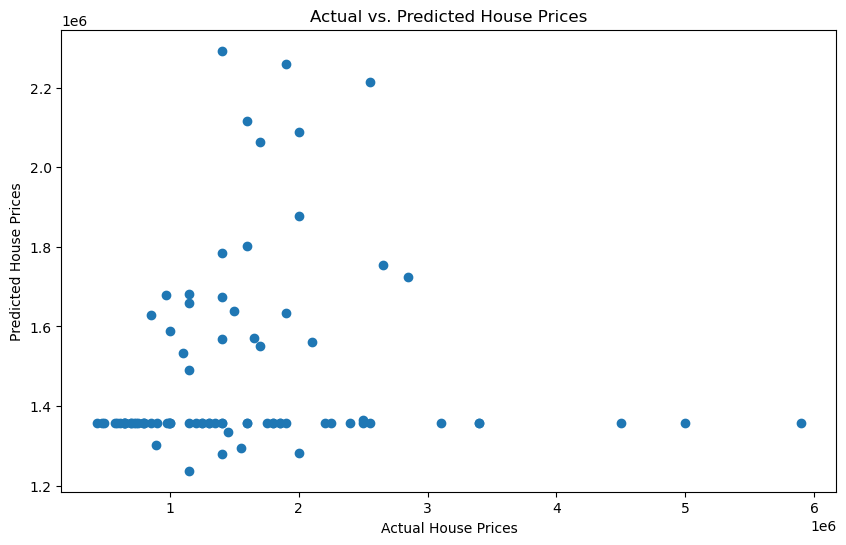

In [17]:
# Model Visualization

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Actual vs. Predicted House Prices")
plt.show()

## RandomForestRegressor

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Initialize the Random Forest Regression model
rf_model = RandomForestRegressor(random_state=42)

# Initialize the SimpleImputer to fill missing values with the mean
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on the training data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Fit the model to the training data
rf_model.fit(X_train_imputed, y_train)

# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test_imputed)

# Evaluate the Random Forest model
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

# Print the evaluation metrics
print("Random Forest Regression Model:")
print(f"Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"Mean Absolute Error (MAE): {mae_rf:.2f}")

Random Forest Regression Model:
Mean Squared Error (MSE): 938710026490.61
Mean Absolute Error (MAE): 626687.01


/var/folders/df/npmhf4fs0qb8cnwm2kmptxk00000gn/T/ipykernel_18479/3083980972.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train_imputed, y_train)


We are using an imputer transformer to fill in or impute missing values in your dataset. Scikit-learn provides various imputers like SimpleImputer to handle missing values.

### Satter Plot of Predicted vs. Actual House Prices

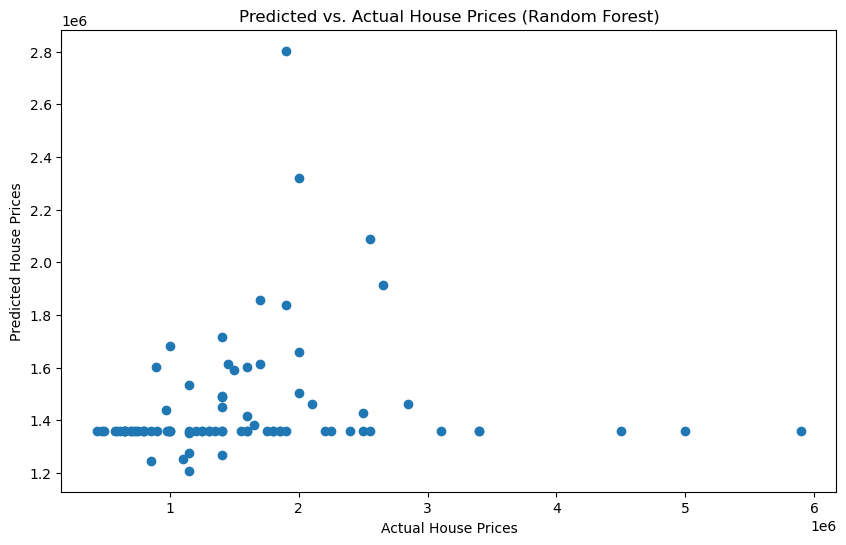

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf)
plt.title('Predicted vs. Actual House Prices (Random Forest)')
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.show()

### Feature Importances Plot:

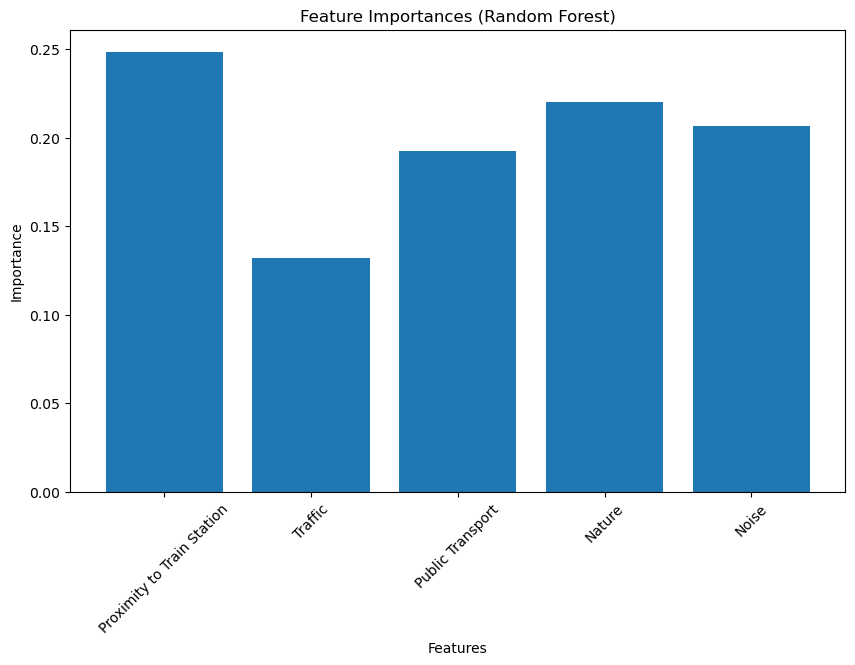

In [20]:
# Get the feature importances from the Random Forest model
feature_importances = rf_model.feature_importances_

# Create a bar chart to visualize feature importances
plt.figure(figsize=(10, 6))
plt.bar(X.columns, feature_importances)
plt.title('Feature Importances (Random Forest)')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()

## HistGradientBoostingRegressor

In [21]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Initialize the HistGradientBoostingRegressor model
hist_gb_model = HistGradientBoostingRegressor(random_state=42)

# Fit the model to the training data
hist_gb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_hist_gb = hist_gb_model.predict(X_test)

# Evaluate the HistGradientBoostingRegressor model
mse_hist_gb = mean_squared_error(y_test, y_pred_hist_gb)
mae_hist_gb = mean_absolute_error(y_test, y_pred_hist_gb)

# Print the evaluation metrics
print("HistGradientBoostingRegressor Model:")
print(f"Mean Squared Error (MSE): {mse_hist_gb:.2f}")
print(f"Mean Absolute Error (MAE): {mae_hist_gb:.2f}")

HistGradientBoostingRegressor Model:
Mean Squared Error (MSE): 965757020973.28
Mean Absolute Error (MAE): 663428.88


/Users/hemang/miniconda3/lib/python3.10/site-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(
/Users/hemang/miniconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In this code, we enable the use of HistGradientBoostingRegressor by importing enable_hist_gradient_boosting. Then, we initialize the model, fit it to the training data, make predictions on the test data, and evaluate its performance using mean squared error (MSE) and mean absolute error (MAE).

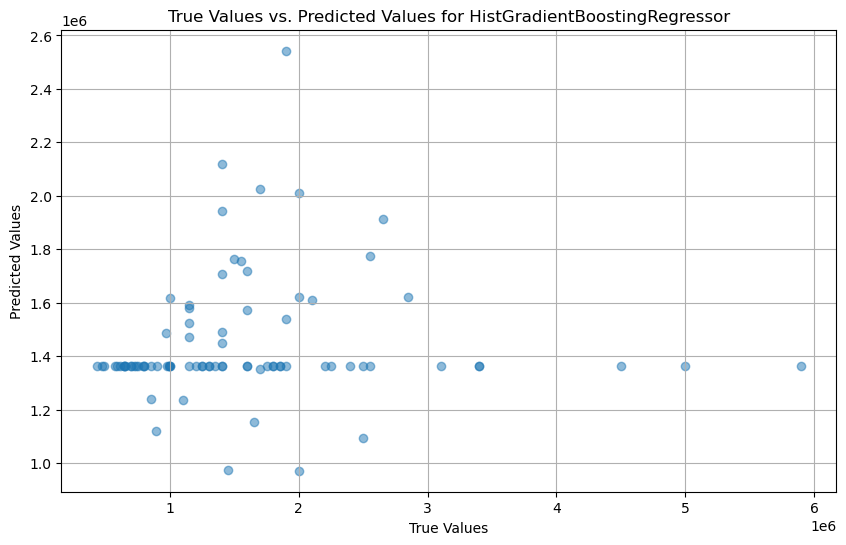

In [27]:
import matplotlib.pyplot as plt

# Plot the predicted values against the true values (actual values)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_hist_gb, alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True Values vs. Predicted Values for HistGradientBoostingRegressor')
plt.grid(True)
plt.show()

In [29]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Initialize the HistGradientBoostingRegressor model
hist_gb_model = HistGradientBoostingRegressor(random_state=42)

# Fit the model to the training data
hist_gb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_hist_gb = hist_gb_model.predict(X_test)

# Evaluate the HistGradientBoostingRegressor model
mse_hist_gb = mean_squared_error(y_test, y_pred_hist_gb)
mae_hist_gb = mean_absolute_error(y_test, y_pred_hist_gb)

# Print the evaluation metrics
print("HistGradientBoostingRegressor Model:")
print(f"Mean Squared Error (MSE): {mse_hist_gb:.2f}")
print(f"Mean Absolute Error (MAE): {mae_hist_gb:.2f}")

HistGradientBoostingRegressor Model:
Mean Squared Error (MSE): 965757020973.28
Mean Absolute Error (MAE): 663428.88


/Users/hemang/miniconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


These metrics provide insights into the performance of your model. MSE measures the average squared difference between the true and predicted values, while MAE measures the average absolute difference. Lower values for both metrics indicate better model performance.